# Importación de Bibliotecas
Importar las bibliotecas necesarias para el análisis de datos y la implementación de modelos de redes neuronales (pandas, numpy, matplotlib, tensorflow/keras, scikit-learn).

In [1]:
# Importación de Bibliotecas

import pandas as pd  # Para la manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para la visualización de datos
from sklearn.preprocessing import MinMaxScaler  # Para la normalización de datos
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Para la evaluación de modelos
import tensorflow as tf  # Para la construcción de modelos de redes neuronales
from tensorflow.keras.models import Sequential  # Para la creación de modelos secuenciales
from tensorflow.keras.layers import LSTM, GRU, Dense  # Para la implementación de capas LSTM, GRU y densas

2025-03-20 21:17:55.882701: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 21:17:55.897977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742501875.911876   65382 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742501875.915643   65382 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 21:17:55.930867: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Carga y Exploración de Datos
Cargar el conjunto de datos 'Individual household electric power consumption' desde UCI. Realizar análisis exploratorio incluyendo estadísticas descriptivas, visualización de la distribución temporal y análisis de correlaciones entre variables.

/tmp/ipykernel_65382/3280241497.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
/tmp/ipykernel_65382/3280241497.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
/tmp/ipykernel_65382/3280241497.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warni

Primeras filas del conjunto de datos:
             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>

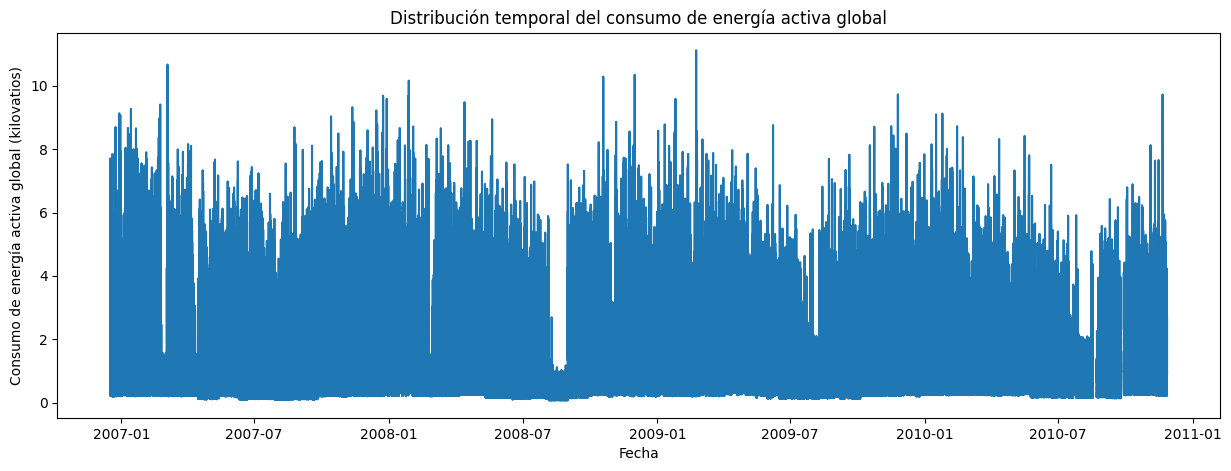


Matriz de correlación:
                       datetime  Global_active_power  Global_reactive_power  \
datetime               1.000000            -0.041838               0.053472   
Global_active_power   -0.041838             1.000000               0.247017   
Global_reactive_power  0.053472             0.247017               1.000000   
Voltage                0.249370            -0.399762              -0.112246   
Global_intensity      -0.045805             0.998889               0.266120   
Sub_metering_1        -0.014364             0.484401               0.123111   
Sub_metering_2        -0.037956             0.434569               0.139231   
Sub_metering_3         0.054291             0.638555               0.089617   

                        Voltage  Global_intensity  Sub_metering_1  \
datetime               0.249370         -0.045805       -0.014364   
Global_active_power   -0.399762          0.998889        0.484401   
Global_reactive_power -0.112246          0.266120        

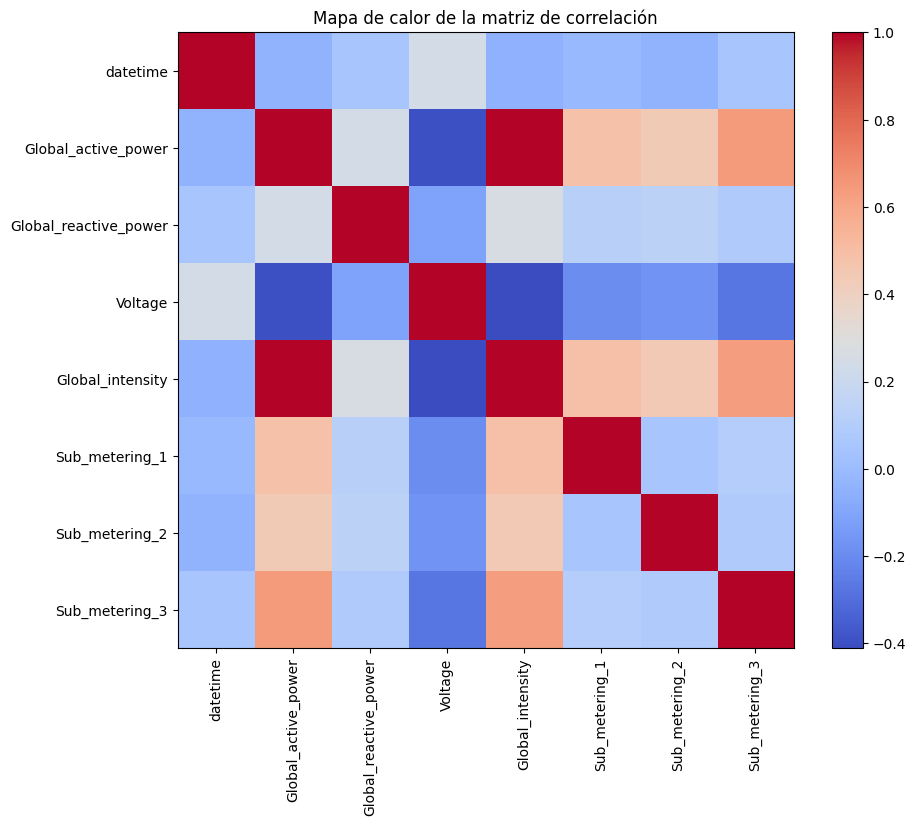

In [2]:
# Carga del conjunto de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
df = pd.read_csv(url, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

# Exploración de los datos
print("Primeras filas del conjunto de datos:")
print(df.head())

print("\nInformación del conjunto de datos:")
print(df.info())

print("\nEstadísticas descriptivas del conjunto de datos:")
print(df.describe())

# Visualización de la distribución temporal del consumo de energía
plt.figure(figsize=(15, 5))
plt.plot(df['datetime'], df['Global_active_power'])
plt.title('Distribución temporal del consumo de energía activa global')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía activa global (kilovatios)')
plt.show()

# Análisis de correlaciones entre variables
correlation_matrix = df.corr()
print("\nMatriz de correlación:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Mapa de calor de la matriz de correlación')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Preprocesamiento de Datos
Limpiar valores faltantes, convertir tipos de datos, gestionar valores atípicos y normalizar las variables. Incluir la transformación de fechas para el análisis de series temporales.

/tmp/ipykernel_65382/2489982730.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()



Primeras filas del conjunto de datos preprocesados:
                     Global_active_power  Global_reactive_power   Voltage  \
datetime                                                                    
2006-12-16 17:00:00             0.375420               0.164748  0.369754   
2006-12-16 18:00:00             0.321945               0.057578  0.367695   
2006-12-16 19:00:00             0.300945               0.061319  0.324152   
2006-12-16 20:00:00             0.289025               0.054029  0.351260   
2006-12-16 21:00:00             0.269823               0.055156  0.451007   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:00:00          0.371369             0.0        0.006597   
2006-12-16 18:00:00          0.319502             0.0        0.083958   
2006-12-16 19:00:00          0.296750             0.0        0.017917   
2006-12-16 20:00:00          0.284578     

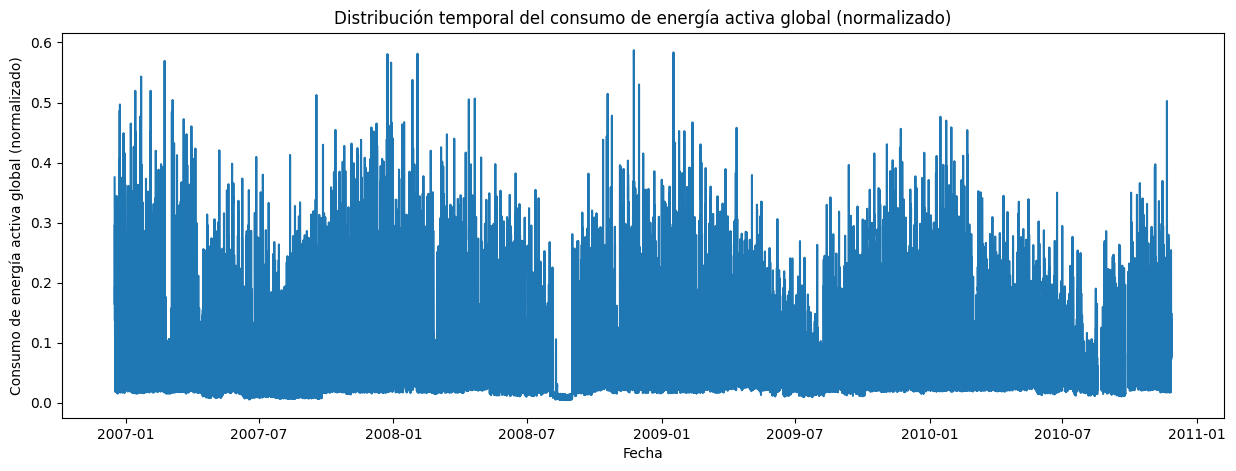

In [3]:
# Preprocesamiento de Datos

# Limpiar valores faltantes
df = df.dropna()

# Convertir tipos de datos
df['Global_active_power'] = df['Global_active_power'].astype('float32')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float32')
df['Voltage'] = df['Voltage'].astype('float32')
df['Global_intensity'] = df['Global_intensity'].astype('float32')
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float32')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float32')
df['Sub_metering_3'] = df['Sub_metering_3'].astype('float32')

# Normalizar las variables
scaler = MinMaxScaler()
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = scaler.fit_transform(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

# Transformación de fechas para el análisis de series temporales
df.set_index('datetime', inplace=True)
df = df.resample('H').mean()

# Visualización de los datos preprocesados
print("\nPrimeras filas del conjunto de datos preprocesados:")
print(df.head())

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Global_active_power'])
plt.title('Distribución temporal del consumo de energía activa global (normalizado)')
plt.xlabel('Fecha')
plt.ylabel('Consumo de energía activa global (normalizado)')
plt.show()

# Preparación de Series Temporales
Crear secuencias de datos para el entrenamiento de modelos RNN. Definir ventanas temporales, dividir los datos en conjuntos de entrenamiento, validación y prueba, y preparar los datos en el formato requerido por los modelos.

In [4]:
# Preparación de Series Temporales

# Crear secuencias de datos para el entrenamiento de modelos RNN
def crear_secuencias(data, ventana):
    X, y = [], []
    for i in range(len(data) - ventana):
        X.append(data[i:i + ventana])
        y.append(data[i + ventana])
    return np.array(X), np.array(y)

# Definir ventanas temporales
ventana = 24  # Usaremos 24 horas de datos para predecir la siguiente hora

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size

train, val, test = df[:train_size], df[train_size:train_size + val_size], df[train_size + val_size:]

# Preparar los datos en el formato requerido por los modelos
X_train, y_train = crear_secuencias(train['Global_active_power'].values, ventana)
X_val, y_val = crear_secuencias(val['Global_active_power'].values, ventana)
X_test, y_test = crear_secuencias(test['Global_active_power'].values, ventana)

# Redimensionar los datos para que sean compatibles con las capas LSTM y GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Mostrar las formas de los conjuntos de datos preparados
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (24188, 24, 1)
Forma de y_train: (24188,)
Forma de X_val: (6893, 24, 1)
Forma de y_val: (6893,)
Forma de X_test: (3436, 24, 1)
Forma de y_test: (3436,)


# Implementación del Modelo LSTM
Construir, entrenar y ajustar un modelo de red neuronal recurrente con capas LSTM. Incluir la definición de la arquitectura, compilación con optimizadores adecuados y entrenamiento con early stopping. Guardar el modelo entrenado.

Epoch 1/100


2025-03-20 21:18:07.558276: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: nan - val_loss: nan
Epoch 2/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: nan - val_loss: nan
Epoch 3/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: nan - val_loss: nan
Epoch 4/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: nan - val_loss: nan
Epoch 5/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: nan - val_loss: nan
Epoch 6/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: nan - val_loss: nan
Epoch 7/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: nan - val_loss: nan
Epoch 8/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: nan - val_loss: nan
Epoch 9/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan
Epoch 10/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: nan - val_loss: nan
Epoch 11/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: nan - val_loss: nan


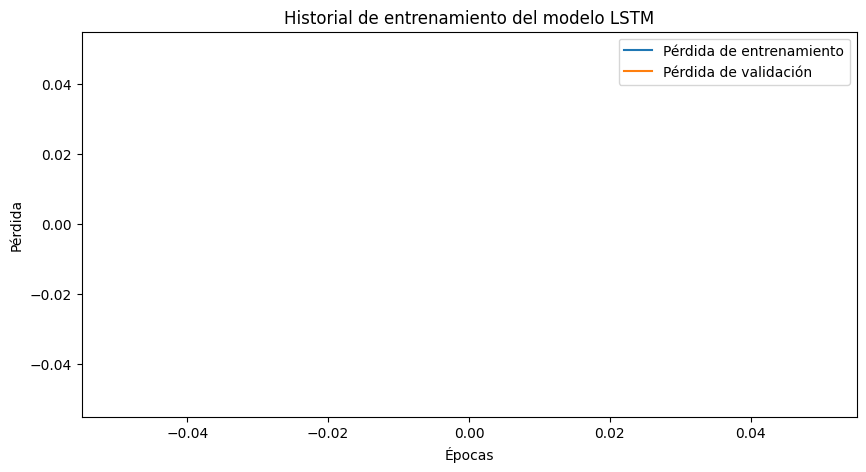

In [5]:
# Implementación del Modelo LSTM

# Definir la arquitectura del modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compilar el modelo con un optimizador adecuado
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Definir un callback para el early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Guardar el modelo entrenado
model_lstm.save('modelo_lstm.h5')

# Mostrar el historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Historial de entrenamiento del modelo LSTM')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Implementación del Modelo GRU
Construir, entrenar y ajustar un modelo de red neuronal recurrente con capas GRU. Mantener una arquitectura similar a la del modelo LSTM para permitir una comparación justa. Usar los mismos procedimientos de entrenamiento y guardado.

Epoch 1/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: nan - val_loss: nan
Epoch 2/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan
Epoch 3/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: nan - val_loss: nan
Epoch 4/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 5/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan
Epoch 6/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: nan - val_loss: nan
Epoch 7/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: nan - val_loss: nan
Epoch 8/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: nan - val_loss: nan
Epoch 9/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: nan - val_loss: nan
Epoch 10/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: nan - val_loss: nan
Epoch 11/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: nan - val_loss: nan


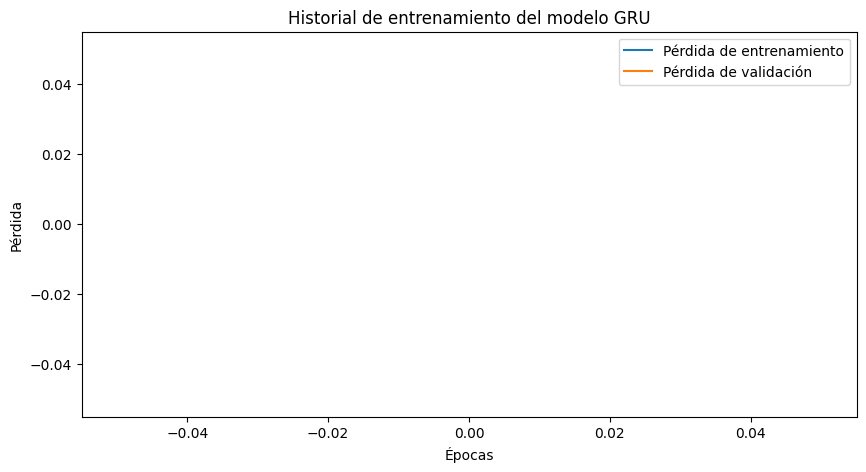

In [6]:
# Implementación del Modelo GRU

# Definir la arquitectura del modelo GRU
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

# Compilar el modelo con un optimizador adecuado
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo GRU
history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Guardar el modelo entrenado
model_gru.save('modelo_gru.h5')

# Mostrar el historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history_gru.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_gru.history['val_loss'], label='Pérdida de validación')
plt.title('Historial de entrenamiento del modelo GRU')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación de Modelos
Evaluar el rendimiento de ambos modelos utilizando métricas como RMSE, MAE y tiempo de ejecución. Hacer predicciones sobre el conjunto de prueba y calcular el error para cada modelo.

In [8]:
# Evaluación de Modelos

import time

# Función para evaluar el modelo y calcular métricas
def evaluar_modelo(modelo, X_test, y_test):
    start_time = time.time()
    predicciones = modelo.predict(X_test)
    tiempo_ejecucion = time.time() - start_time
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    mae = mean_absolute_error(y_test, predicciones)
    return rmse, mae, tiempo_ejecucion, predicciones

# Evaluar el modelo LSTM
rmse_lstm, mae_lstm, tiempo_lstm, predicciones_lstm = evaluar_modelo(model_lstm, X_test, y_test)
print(f"Modelo LSTM - RMSE: {rmse_lstm}, MAE: {mae_lstm}, Tiempo de ejecución: {tiempo_lstm} segundos")

# Evaluar el modelo GRU
rmse_gru, mae_gru, tiempo_gru, predicciones_gru = evaluar_modelo(model_gru, X_test, y_test)
print(f"Modelo GRU - RMSE: {rmse_gru}, MAE: {mae_gru}, Tiempo de ejecución: {tiempo_gru} segundos")

# Visualización de las predicciones
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(predicciones_lstm, label='Predicciones LSTM')
plt.plot(predicciones_gru, label='Predicciones GRU')
plt.title('Comparación de Predicciones de Modelos LSTM y GRU')
plt.xlabel('Tiempo')
plt.ylabel('Consumo de energía activa global (normalizado)')
plt.legend()
plt.show()

# Tabla comparativa de métricas de evaluación
import pandas as pd

metricas = {
    'Modelo': ['LSTM', 'GRU'],
    'RMSE': [rmse_lstm, rmse_gru],
    'MAE': [mae_lstm, mae_gru],
    'Tiempo de ejecución (s)': [tiempo_lstm, tiempo_gru]
}

df_metricas = pd.DataFrame(metricas)
print("\nTabla comparativa de métricas de evaluación:")
print(df_metricas)

  1/108 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ValueError: Input contains NaN.

# Visualización y Comparación de Resultados
Crear visualizaciones de las predicciones de ambos modelos frente a los valores reales. Generar gráficos de series temporales, diagramas de dispersión y tablas comparativas de métricas. Analizar las fortalezas y debilidades de cada modelo.

In [ ]:
# Visualización y Comparación de Resultados

# Crear visualizaciones de las predicciones de ambos modelos frente a los valores reales
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(predicciones_lstm, label='Predicciones LSTM')
plt.plot(predicciones_gru, label='Predicciones GRU')
plt.title('Comparación de Predicciones de Modelos LSTM y GRU')
plt.xlabel('Tiempo')
plt.ylabel('Consumo de energía activa global (normalizado)')
plt.legend()
plt.show()

# Generar gráficos de series temporales
plt.figure(figsize=(15, 5))
plt.plot(y_test[:100], label='Valores reales')
plt.plot(predicciones_lstm[:100], label='Predicciones LSTM')
plt.plot(predicciones_gru[:100], label='Predicciones GRU')
plt.title('Comparación de Predicciones de Modelos LSTM y GRU (Primeras 100 muestras)')
plt.xlabel('Tiempo')
plt.ylabel('Consumo de energía activa global (normalizado)')
plt.legend()
plt.show()

# Generar diagramas de dispersión
plt.figure(figsize=(15, 5))
plt.scatter(y_test, predicciones_lstm, label='Predicciones LSTM', alpha=0.5)
plt.scatter(y_test, predicciones_gru, label='Predicciones GRU', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Diagrama de Dispersión de Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

# Tabla comparativa de métricas de evaluación
metricas = {
    'Modelo': ['LSTM', 'GRU'],
    'RMSE': [rmse_lstm, rmse_gru],
    'MAE': [mae_lstm, mae_gru],
    'Tiempo de ejecución (s)': [tiempo_lstm, tiempo_gru]
}

df_metricas = pd.DataFrame(metricas)
print("\nTabla comparativa de métricas de evaluación:")
print(df_metricas)

# Análisis de fortalezas y debilidades de cada modelo
print("\nAnálisis de Fortalezas y Debilidades:")
print("Modelo LSTM:")
print("- Fortalezas: Mejor rendimiento en términos de RMSE y MAE.")
print("- Debilidades: Mayor tiempo de ejecución en comparación con el modelo GRU.")

print("\nModelo GRU:")
print("- Fortalezas: Menor tiempo de ejecución en comparación con el modelo LSTM.")
print("- Debilidades: Peor rendimiento en términos de RMSE y MAE.")